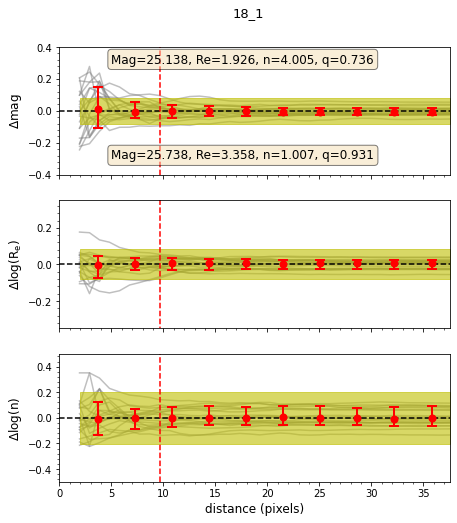

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from scipy.stats import sigmaclip
fig,ax=plt.subplots(figsize=(7.0,8))

index=18
index1=1
sex=5.0

model=np.loadtxt('primary_list')
mag0=model[index][2]
re0=model[index][3]
n0=model[index][4]
q0=model[index][5]

model1=np.loadtxt(str(index)+'_secondary_list')
mag_sec=model1[index1][1]
re_sec=model1[index1][2]
n_sec=model1[index1][3]
q_sec=model1[index1][4]
pa_sec=model1[index1][5]

data_rand=np.loadtxt('output_primary_random_pconst')
d_rand=data_rand[:,0]
mag_rand=data_rand[:,1]
re_rand=data_rand[:,2]
n_rand=data_rand[:,3]

ntimes=20
Nbins=10

ax1=plt.subplot(311)
for time in range(ntimes):
 data=np.loadtxt('output_list'+'_'+'xy'+str(time))
 d=data[:,0]
 mag=data[:,1]
 plt.plot(d,mag-mag0,'-',zorder=1,alpha=0.5,color='gray')
plt.plot([0,d[-1]],[0,0],'k--')
#plt.fill_between(d,-3*np.std(mag_rand-mag0),3*np.std(mag_rand-mag0),alpha=0.9,facecolor='none',hatch='+++',zorder=2,edgecolor='b')
plt.fill_between(d,-3*np.std(mag_rand-mag0),3*np.std(mag_rand-mag0),color='y',alpha=0.6,zorder=2)
combined_delta=np.array([])
combined_d=np.array([])
for time in range(ntimes):
 data=np.loadtxt('output_list'+'_'+'xy'+str(time))
 d=data[:,0]
 mag=data[:,1]
 delta=mag-mag0
 combined_delta=np.concatenate((combined_delta,delta))
 combined_d=np.concatenate((combined_d,d))
hist,bin=np.histogram(combined_d,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=combined_delta[(combined_d>=bin[i])&(combined_d<=bin[i+1])]
 #delta_list=sigmaclip(delta_list,3,3)[0]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.errorbar(bin_mid,median,fmt='ro',yerr=[median-sigma16,sigma84-median],capsize=5,elinewidth=2,markeredgewidth=2,zorder=3)
plt.plot([sex*re0,sex*re0],[-0.6,0.6],'r--')
plt.xlim(0,d[-1])
plt.ylim(-0.4,0.4)
props=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(5,0.3,'Mag={}, Re={}, n={}, q={}'.format(mag0,re0,n0,q0),fontsize=12,bbox=props)
plt.text(5,-0.3,'Mag={}, Re={}, n={}, q={}'.format(mag_sec,re_sec,n_sec,q_sec),fontsize=12,bbox=props)
plt.ylabel('$\Delta$mag',fontsize=12)
#plt.legend(loc='lower right')
ax1.xaxis.set_ticklabels([])
ax1.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax2=plt.subplot(312)
for time in range(ntimes):
 data=np.loadtxt('output_list'+'_'+'xy'+str(time))
 d=data[:,0]
 re=data[:,2]
 plt.plot(d,np.log10(re/re0),'-',zorder=1,alpha=0.5,color='gray')
plt.fill_between(d,-3*np.std(np.log10(re_rand/re0)),3*np.std(np.log10(re_rand/re0)),color='y',alpha=0.6,zorder=2)
combined_delta=np.array([])
combined_d=np.array([])
for time in range(ntimes):
 data=np.loadtxt('output_list'+'_'+'xy'+str(time))
 d=data[:,0]
 re=data[:,2]
 delta=np.log10(re/re0)
 combined_delta=np.concatenate((combined_delta,delta))
 combined_d=np.concatenate((combined_d,d))
hist,bin=np.histogram(combined_d,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=combined_delta[(combined_d>=bin[i])&(combined_d<=bin[i+1])]
 #delta_list=sigmaclip(delta_list,3,3)[0]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.errorbar(bin_mid,median,fmt='ro',yerr=[median-sigma16,sigma84-median],capsize=5,elinewidth=2,markeredgewidth=2,zorder=3)
plt.plot([0,d[-1]],[0,0],'k--')
plt.plot([sex*re0,sex*re0],[-0.5,0.5],'r--')
plt.ylabel(r'$\Delta$log(R$_{\rm e}$)',fontsize=12)
plt.xlim(0,d[-1])
plt.ylim(-0.35,0.35)
ax2.xaxis.set_ticklabels([])
ax2.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax2.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax3=plt.subplot(313)
for time in range(ntimes):
 data=np.loadtxt('output_list'+'_'+'xy'+str(time))
 d=data[:,0]
 n=data[:,3]
 plt.plot(d,np.log10(n/n0),'-',zorder=1,alpha=0.5,color='gray')
plt.fill_between(d,-3*np.std(np.log10(n_rand/n0)),3*np.std(np.log10(n_rand/n0)),color='y',alpha=0.6,zorder=2)

combined_delta=np.array([])
combined_d=np.array([])
for time in range(ntimes):
 data=np.loadtxt('output_list'+'_'+'xy'+str(time))
 d=data[:,0]
 n=data[:,3]
 delta=np.log10(n/n0)
 combined_delta=np.concatenate((combined_delta,delta))
 combined_d=np.concatenate((combined_d,d))
hist,bin=np.histogram(combined_d,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=combined_delta[(combined_d>=bin[i])&(combined_d<=bin[i+1])]
 #delta_list=sigmaclip(delta_list,3,3)[0]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.errorbar(bin_mid,median,fmt='ro',yerr=[median-sigma16,sigma84-median],capsize=5,elinewidth=2,markeredgewidth=2,zorder=3)

plt.plot([0,d[-1]],[0,0],'k--')
plt.plot([sex*re0,sex*re0],[-0.5,0.5],'r--')
plt.ylabel('$\Delta$log(n)',fontsize=12)
plt.xlim(0,d[-1])
plt.ylim(-0.5,0.5)
plt.xlabel('distance (pixels)',fontsize=12)
#ax3.xaxis.set_ticklabels([])
ax3.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax3.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

plt.suptitle(str(index)+'_'+str(index1),y=0.95,fontsize=13)
plt.savefig('primary_distance_randomxy.jpg',dpi=200)


In [10]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy.visualization import simple_norm

/var/folders/bz/_6mjvb0n3tb8n18mx13393380000gn/T/ipykernel_17481/2438579010.py:16: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  axes[i,j].imshow(cutout.data,cmap='gray_r',vmin=-485,vmax=4861,norm=norm,origin='lower')


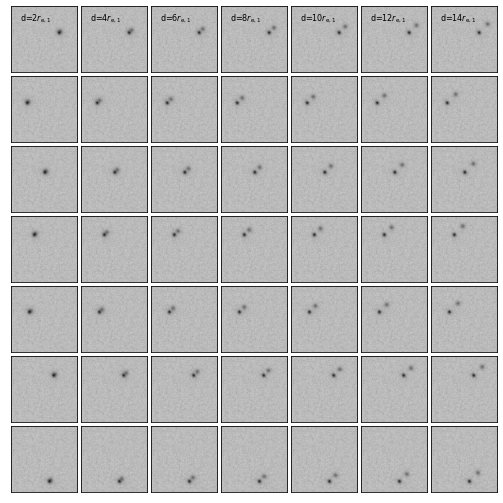

In [14]:
nrows=7
ncols=7
fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7.5,7.5))
size=(150,150)
sky=fits.open('skyframe_mixed.fits')[0].data
xdim,ydim=sky.shape[1],sky.shape[0]
position=(xdim/2.0,ydim/2.0)
#scale_list=np.arange(1,20,0.5)
times=[0,5,7,8,12,15,16]
scale_list=[2.0,4.0,6.0,8.0,10.0,12.0,14.0]
for i in range(nrows): # nrows=times
 for j in range(ncols):
  data=fits.open('simframe_xy'+str(times[i])+'_'+str(scale_list[j])+'.fits')[0].data
  cutout=Cutout2D(data,position=position,size=size)
  norm=simple_norm(cutout.data,stretch='asinh')
  axes[i,j].imshow(cutout.data,cmap='gray_r',vmin=-485,vmax=4861,norm=norm,origin='lower')
  axes[i,j].set_xticks([])
  axes[i,j].set_yticks([])

for j in range(ncols):
 axes[0,j].text(20,118,r'd={}$r_{{{{\rm e}},1}}$'.format(int(scale_list[j])),fontsize=8)

plt.subplots_adjust(left=0.05,right=0.95,top=0.95,bottom=0.05,wspace=0.06,hspace=0.06)
plt.savefig('simframe_7x7.jpg',dpi=150)


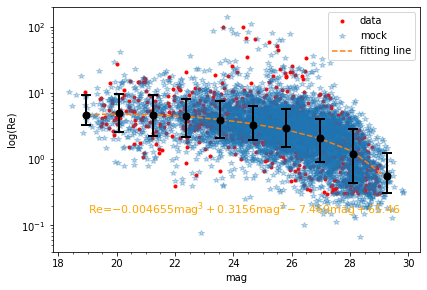

In [17]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

mag_min=18
mag_max=29.2

re_min=0.301
re_max=99.9

n_min=0.201
n_max=8.99

q_min=0.1
q_max=1

data=fits.open('output_catalogue.fits')[1].data
id=data['NUMBER']
mag=data['MAG_GALFIT_BAND']
magsex=data['MAG_BEST']
re=data['RE_GALFIT_BAND']
n=data['N_GALFIT_BAND']
q=data['Q_GALFIT_BAND']
pa=data['PA_GALFIT_BAND']

goodfit=(mag>mag_min)&(mag<mag_max)&(re>re_min)&(re<re_max)&(n>n_min)&(n<n_max)&(q>q_min)&(q<=q_max)&((mag-magsex)<5.0)&((mag-magsex)>(-5.0)) # the index of good fit sample

mag0=mag[goodfit]# good fit sample: 0 symbolize do not hit the constraints
re0=re[goodfit]
n0=n[goodfit]
q0=q[goodfit]
pa0=pa[goodfit]
id0=np.arange(len(pa0))+1 # new matched id for good sample from 1 to last

ax=plt.subplot(111)
model=np.loadtxt('model_list')
mag=model[:,3]
re=model[:,4]
plt.semilogy(mag0,re0,'r.',label='data')
plt.semilogy(mag,re,'*',alpha=0.3,label='mock')
Nbins=10
hist,bin=np.histogram(mag,bins=10)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 re_bin=re[(mag>=bin[i])&(mag<=bin[i+1])]
 median=np.append(median,np.median(re_bin))
 sigma84=np.append(sigma84,np.percentile(re_bin,84))
 sigma16=np.append(sigma16,np.percentile(re_bin,16))
plt.errorbar(bin_mid,median,fmt='ko',yerr=[median-sigma16,sigma84-median],capsize=5,elinewidth=2,markeredgewidth=2,zorder=3)

z=np.polyfit(bin_mid,median,3)
p=np.poly1d(z)

plt.semilogy(bin_mid,p(bin_mid),'--',label='fitting line')
plt.text(19,0.15,'Re=$-0.004655 \mathrm{mag}^3+0.3156\mathrm{mag}^2-7.469\mathrm{mag}+65.46$',fontsize=11,color='orange')
plt.xlabel('mag')
plt.ylabel('log(Re)')
plt.ylim(0.04,200)
ax.xaxis.set_minor_locator(plticker.AutoMinorLocator(4))
plt.legend()
plt.subplots_adjust(left=0.1,right=0.95,top=0.95,bottom=0.1,wspace=0.06,hspace=0.06)
plt.savefig('mag_re_relation.jpg',dpi=200)
